In [4]:
import pandas as pd


In [5]:
fruits = pd.read_csv('../Data/fruits.csv')
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


In [6]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  49 non-null     float64
 1   weight  49 non-null     float64
 2   name    49 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


> fruits는 35개의 사과와 14개의 딸기 데이터로 구성되어 있음

In [7]:
# 사과 정보 불러오기

apple = fruits[fruits['name'] == 'apple']
apple.tail()

,length,weight,name
30,38.5,920.0,apple
31,38.5,955.0,apple
32,39.5,925.0,apple
33,41.0,975.0,apple
34,41.0,950.0,apple


In [8]:
# apple에 대한 산포도 그리기

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
plt.style.use('default')

Text(0, 0.5, 'Weight')

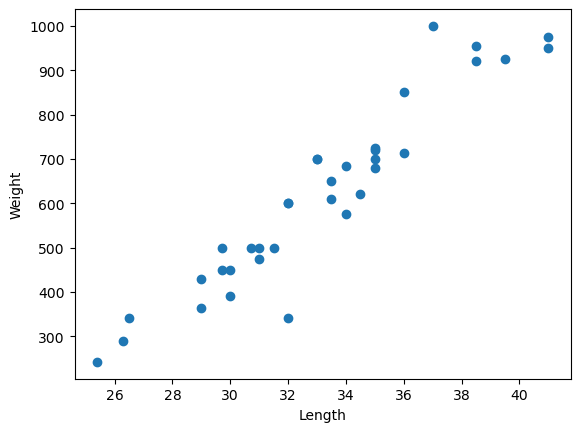

In [9]:
plt.scatter(
    apple['length'],
    apple['weight'],
)

plt.xlabel('Length')
plt.ylabel('Weight')

In [10]:
# 딸기(berry)에 대한 산포도 그리기
berry = fruits[fruits['name'] == 'berry']
berry.head()

,length,weight,name
35,9.8,6.7,berry
36,10.5,7.5,berry
37,10.6,7.0,berry
38,11.0,9.7,berry
39,11.2,9.8,berry


Text(0, 0.5, 'Weight')

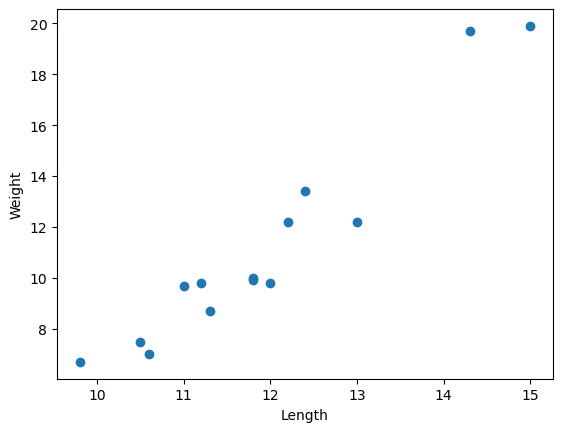

In [11]:
plt.scatter(
    berry['length'],
    berry['weight'],
)

plt.xlabel('Length')
plt.ylabel('Weight')

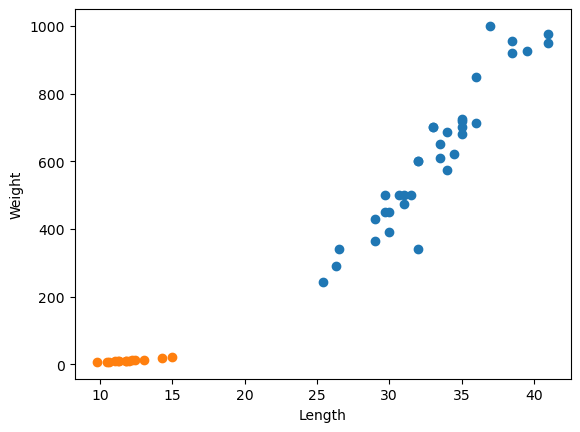

In [12]:
# 2개의 DataSetdmf 산포도로 한꺼번에 비교하기
plt.scatter(apple.length, apple.weight)
plt.scatter(berry.length, berry.weight)


plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

---
# 머신러닝을 위한 데이터 준비
### Feature Data와 Target Data의 분리

In [13]:
# Farture Data

fruitsData = fruits[['length','weight']]
fruitsData.head()

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [14]:
# Target Data

fruitsTarget = fruits['name']
fruitsTarget.head()

0    apple
1    apple
2    apple
3    apple
4    apple
Name: name, dtype: object

---
# 최근접 이웃(KNN : K Nearest Neighbors) 분류 알고리즘 사용
: 최근접 이웃 분류 알고리즘은 지도학습이다.

![](../Data/knn-01.png)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
kn = KNeighborsClassifier() # n_neighbors = 5 / 보통은 홀수로 입력 <-- Hyper Parameter

In [17]:
# 학습시키기
kn.fit(fruitsData, fruitsTarget)


KNeighborsClassifier()

In [18]:
# 정확성 확인하기
kn.score(fruitsData, fruitsTarget)

1.0

> 문제와 답을 다 알려주고 정확성을 확인했더니 바로 100점이 나왔다. 근데 좀...

### 예측해 보기
길이가 30cm 이고 무게가 600g인 과일은 무엇일까요?

In [21]:
kn.predict([[30,600]])


array(['apple'], dtype=object)

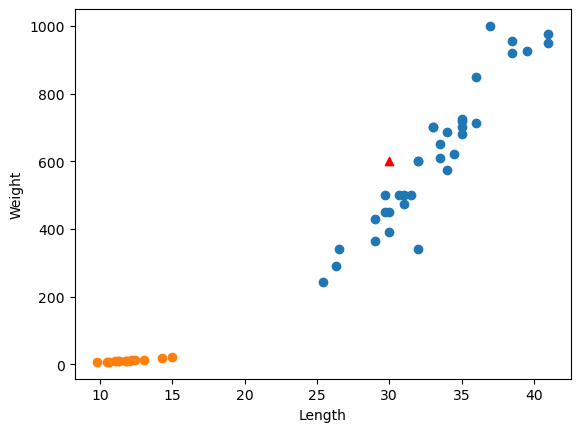

In [22]:
# 산포도로 예측 범위 확인하기

plt.scatter(apple.length, apple.weight)
plt.scatter(berry.length, berry.weight)
plt.scatter(30, 600, marker='^', c='red')


plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()